Here we reproduce the results of Laursen et al (2009) [[doi](https://iopscience.iop.org/article/10.1088/0004-637X/696/1/853)]. I try two methods for this. In the 1st one I use the Hubble flow version with the following settings:
1. `fix_nhi` = $n_\mathrm{H}=3.84\times10^{-3}\,\mathrm{cm^{-3}}$
2. `fix_vth` = $b=12.9\times 10^5$ so that the temperature is $T=10^4\,\mathrm{K}$
3. `fix_box_size_cm` = $10.44\times10^{22}\,\mathrm{cm}$ and `comput_dom_rsp = 0.499`

I run this on RAMSES output `output_00015` which is at $z=8.93$. For this configuration $N_\mathrm{H}=2\times10^{20}\,\mathrm{cm^{-2}}$ and $v_\mathrm{max}=20\,\mathrm{kms^{-1}}$.

In the 2nd type I use the radial version of RASCAS (provided by Leo in a private communication). For this also I prepared the domains on `output_00015`. In both cases I used a monochromatic emission of Ly$\alpha$ photons. Total no.of MC photons $10^6$.

In [3]:
import numpy as np
x1=[]
J1=[]

#Path to the file containing the points from fig.8 of Laursen et al (2009)
#The file is a .dat accessible like a text file. So we convert it into a usable form.
fil=open('/home/shikhar/work/Laursen/Laursen20.dat','r')
c=1
for line in fil:
	if c>2:
		line=line.split()
		x1.append(line[0])
		J1.append(line[1])
	c=c+1

x1=[float(i) for i in x1]
J1=[float(i) for i in J1]
fil.close()
np.save('x20',x1)
np.save('J20',J1)

No.of MC photons = 1000000


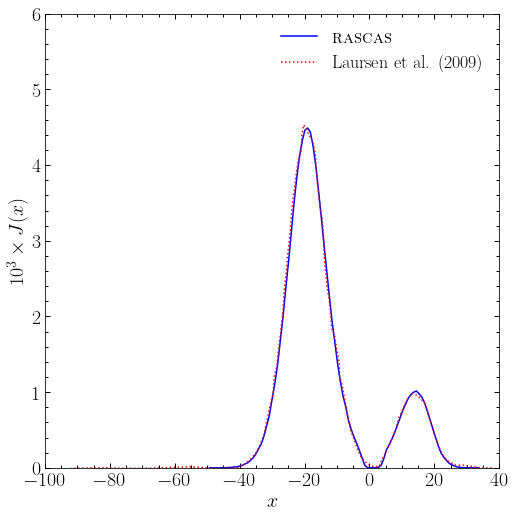

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import photons as p

b = 12.9e5 #average thermal velocity in cm/s
nbin = 100

#Path to the file generated by RASCAS. 'v20' represents 20 km/s velocity at the boundary of sphere.
#One by one use load the data:
# 1. for a radially expanding sphere and 2. its a true Hubble. (file names are obvious).
filePhotons = '/home/shikhar/work/Laursen/v20_radial.dat'
#filePhotons = '/home/shikhar/work/Laursen/v20_hubble.dat'

grid = p.from_file(filePhotons)
delta_nu = p.nu_0 * b / p.clight
xx = (grid.nu - p.nu_0) / delta_nu

hist,bn=np.histogram(xx, bins=nbin, density=True)
x = (bn[1:]+bn[:-1])/2
hist = hist/(4*np.pi)

x20 = np.load('x20.npy')
J20 = np.load('J20.npy')


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig,ax=plt.subplots(figsize=(8.3,7.5))
fig.subplots_adjust(left=0.12, bottom=0.05, right=0.88, top=0.95)
ax.plot(x, 1000*hist,'b',label=r'$\textsc{rascas}$')
ax.plot(x20,J20,'r',ls=':',label='Laursen et al. (2009)')
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$10^3\times J(x)$', fontsize=20)
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_xlim([-100,40])
ax.set_ylim([0,6])
ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in')
ax.tick_params(axis='both', which='minor', length=3, width=1, direction='in')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
ax.legend(fontsize=18,frameon=False)
plt.show()

In [5]:
#Save the xy data for plotting later.
np.save('x20_radial',x)
np.save('J20_radial',hist)

#np.save('x20_hubble',x)
#np.save('J20_hubble',hist)

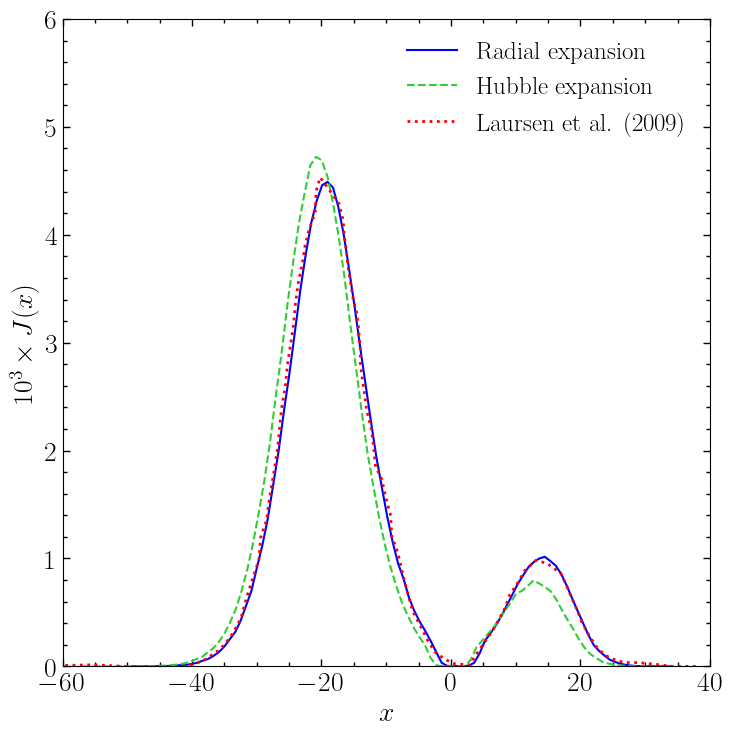

In [1]:
from matplotlib import pyplot as plt
import numpy as np

x20 = np.load('x20.npy')
J20 = np.load('J20.npy')

x20_radial = np.load('x20_radial.npy')
J20_radial = np.load('J20_radial.npy')
x20_hubble = np.load('x20_hubble.npy')
J20_hubble = np.load('J20_hubble.npy')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig,ax=plt.subplots(figsize=(8.3,7.3))
fig.subplots_adjust(left=0.11, bottom=0.05, right=0.89, top=1.0)
ax.plot(x20_radial, 1000*J20_radial,'b',label='Radial expansion')
ax.plot(x20_hubble, 1000*J20_hubble,color='limegreen',ls='--',label='Hubble expansion')
ax.plot(x20,J20,'r',ls=':',lw=2,label='Laursen et al. (2009)')
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$10^3\times J(x)$', fontsize=20)
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_xlim([-60,40])
ax.set_ylim([0,6])
ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in')
ax.tick_params(axis='both', which='minor', length=3, width=1, direction='in')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
ax.legend(fontsize=18,frameon=False)
#plt.show()
plt.savefig('v20.pdf')